<a href="https://colab.research.google.com/github/MuhilanRavi/BigMart-Sales-Prediction/blob/main/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# Uploading dataset
uploaded = files.upload()


Saving bigmart.csv to bigmart.csv


In [4]:
import pandas as pd
import numpy as np

# Loading the dataset in a python dataframe
df = pd.read_csv('bigmart.csv')

print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows:")
df.head()


Dataset loaded successfully!
Shape of dataset: (8523, 12)

First 5 rows:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print(df.isnull().sum())
print(df.dtypes)

print(df.describe())

# frequency of outlet type and item type
print(df['Outlet_Type'].value_counts())
print(df['Item_Type'].value_counts())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.

/tmp/ipython-input-1226907406.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


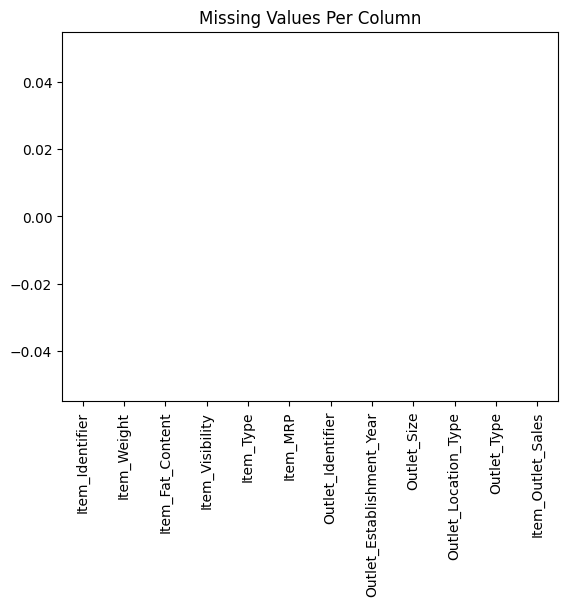

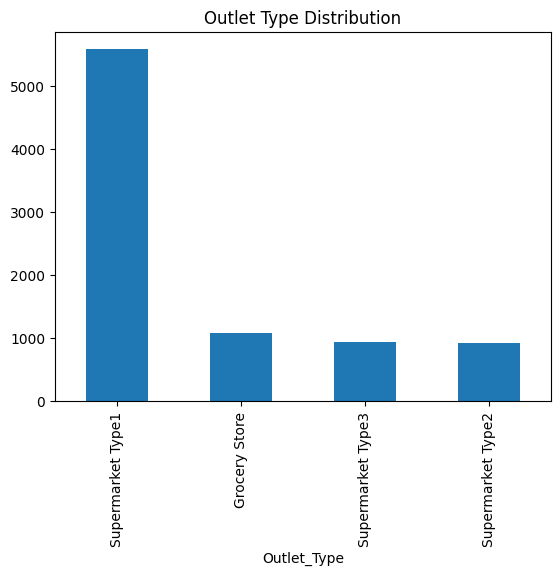

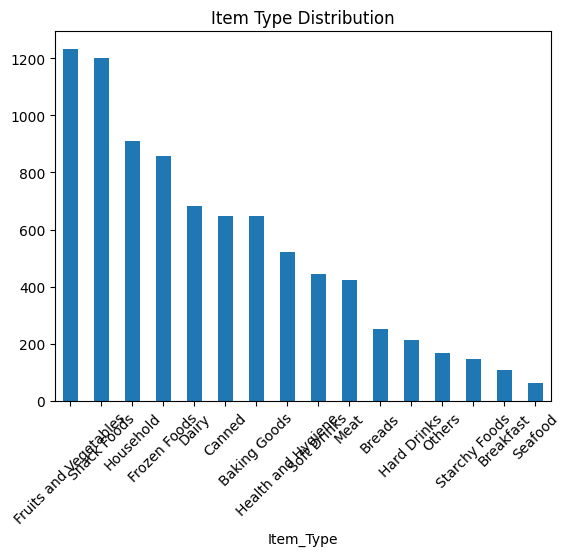

In [8]:
import matplotlib.pyplot as plt

#filling missing values with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

#filling missing values with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Visualizing missing data for each column
df.isnull().sum().plot(kind='bar', title='Missing Values Per Column')
plt.show()

df['Outlet_Type'].value_counts().plot(kind='bar', title='Outlet Type Distribution')
plt.show()

df['Item_Type'].value_counts().plot(kind='bar', title='Item Type Distribution')
plt.xticks(rotation=45)
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder

# encoding categorical contents
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
            'Outlet_Location_Type', 'Outlet_Type']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

# splitting data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (6818, 10), Test shape: (1705, 10)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on test data: {rmse:.2f}")
print(f"R² score on test data: {r2:.2f}")


RMSE on test data: 1080.82
R² score on test data: 0.57
